CPSC 483  Project 3
due March 26 (Section 02)
Team Member Names
#Kenny Giang           CWID: 890062292
#Christopher Millones  CWID: 887355980
#Suhrab Yeawary        CWID: 888200631
*******************README****************
In this project we used scikit-learn which is considered as higher-level machine learning libarary that worked 
with NumPy, and we had to work with linear and polynomial regression models.
we started our work from 
1) Loaded up the Boston dataset the same as the last 2 projects
2) We made 'CRIM' the new target value by assigning "bostonTargets" to the whole set and then removing all the columns except 'CRIM'. I was trying to find a way to index the ".data" but I couldn't get anything to work. I changed feature by assigning a var "MEDV" and
 the target and then adding it to bostonFeatures and then dropping 'CRIM' from it.
3) We had to create  a scatterplot of the training data showing the relationship between the percentage of the population that is lower status and the median value of a home which was similar to project 2 
however, we had hard time with 4,6,8 where we spend most of our time trying to get the algorithm and second try to convert it in python language. 
4) we had create the fit() using the model and the coef_ and intercept_ attributes of the model, 
what is the equation for MEDV as a linear function of LSTAT here we had to work on coef and intercept attributes and model and here the team was having hard time getting the concept work.
5) we have had to use the attributes of the model to add a line which would represent the least squares fit in the scatter this was not that hard to the team since we had done it on project2.

6) we had to se the predict() method of the model to find the response for each value of the LSTAT attribute in the training set. 
Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the training set.
After #6 it was pretty much repeating the experiment and however, this project was pretty hard for the team 
but we worked together and made it work.


*******************CODE******************************


#1 creating the feature and targeting sets 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#1
data = np.load('boston.npz')
features = np.array(data['features'])
target = np.array(data['target'])

#2 

In [6]:
from sklearn.model_selection import train_test_split

#ft = feature_training
#fts = feature_test_sets
#tt = target_trainning
#tts = target_test_sets

ft,fts,tt,tts = train_test_split(features, 
                                 target, 
                                 test_size=.20,
                                 train_size=.80,
                                 random_state=(2021-3-11))


LSTAT = ft[:,12][:,None]
LSTAT2 = fts[:,12][:,None]
MEDV = tt[:,None]
tts_degree2 = tts[:,None]


AttributeError: 'numpy.ndarray' object has no attribute 'LSTAT'

#3 
Does the relationship appear to be linear?
The graph below does NOT appear to be linear. 

Text(0, 0.5, 'Median value of homes')

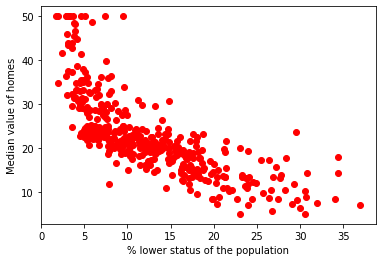

In [261]:
plt.plot(LSTAT, MEDV, 'ro')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of homes")

#4 
what is the equation for MEDV as a linear function of LSTAT?
MEDV = -0.94711632LSTAT + 34.65935978

In [262]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(LSTAT,MEDV)
print(reg.coef_)
print(reg.intercept_)


[[-0.98093888]]
[34.99113302]


#5
How well does the model appear to fit the training data? 
The model appears to underfit the data

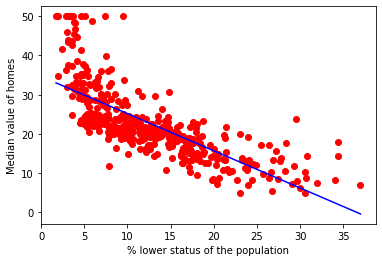

In [263]:
testx = np.linspace(min(LSTAT),max(LSTAT),404)
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,[34.65935978,-0.94711632])

plt.plot(LSTAT, MEDV, 'ro')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of homes")
plt.plot(testx,testt,'b')

#6
MSE = 38.47893344802523

In [264]:
from sklearn.metrics import mean_squared_error
ft_prediction = reg.predict(ft[:,12][:,None])
ft_mse = mean_squared_error(y_true=tt, y_pred=ft_prediction )



ft_mse

38.47893344802523

#7
MSE = 38.75054664279497
How do the training and test MSE values compare? 
They are very much similar. 

In [265]:
fts_prediction = reg.predict(fts[:,12][:,None])
fts_mse = mean_squared_error(y_true=tts, y_pred=fts_prediction )


fts_mse

38.75054664279497

#8


In [266]:
for i in range(1,404):
    LSTAT_degree2=np.hstack((LSTAT,LSTAT**2))
    

reg2 = LinearRegression().fit(LSTAT_degree2,MEDV)
print(reg2.coef_)
print(reg2.intercept_)

[[-2.365919    0.04440767]]
[43.07121508]


In [267]:
ft_prediction_2 = reg2.predict(LSTAT_degree2)
ft_mse_2 = mean_squared_error(y_true=tt, y_pred=ft_prediction_2)

ft_mse_2

30.598514349370962

In [268]:
for i in range(1,404):
    LSTAT_degree2=np.hstack((LSTAT2,LSTAT2**2))
    
ft_prediction_2 = reg2.predict(LSTAT_degree2)
ft_mse_2 = mean_squared_error(y_true=tts, 
                              y_pred=ft_prediction_2)
ft_mse_2

29.297124138279123